<a href="https://colab.research.google.com/github/hariseldon99/msph402b/blob/main/Computational_Linear_Algebra_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All Example Codes for Computational Linear Algebra
===================================================

**Examples for Gaussian Method**
* From file [gauss_method_ex.py](03-Computational_Linear_Algebra/gauss_method_ex.py)

#### The Problem:

Use the Gaussian elimination method to solve the following sets of linear equations.

\begin{align*}
25x + 5y + z &= 106.8 \\
64x + 8y + z &= 177.2 \\
144x + 12y + z &=279.2,
\end{align*}

and

\begin{align*}
12x + 10y - 7z &= 15 \\
6x + 5y + 3z &=  4\\
5x - y + 5z &= 9
\end{align*}

In [2]:
import numpy as np

def GEPP(A, b, doPP = True):
    '''
    Gaussian elimination with partial pivoting.
    
    input: A is an n x n numpy matrix
           b is an n x 1 numpy array
    output: x is the solution of Ax=b 
            with the entries permuted in 
            accordance with the pivoting 
            done by the algorithm
    post-condition: A and b have been modified.
    '''
    n = len(A)
    if b.size != n:
        raise ValueError("Invalid argument: incompatible sizes between"+
                         "A & b.", b.size, n)
    # k represents the current pivot row. Since GE traverses the matrix in the 
    # upper right triangle, we also use k for indicating the k-th diagonal 
    # column index.
    
    # Elimination
    for k in range(n-1):
        if doPP:
            # Pivot
            maxindex = abs(A[k:,k]).argmax() + k
            if A[maxindex, k] == 0:
                raise ValueError("Matrix is singular.")
            # Swap
            if maxindex != k:
                A[[k,maxindex]] = A[[maxindex, k]]
                b[[k,maxindex]] = b[[maxindex, k]]
        else:
            if A[k, k] == 0:
                raise ValueError("Pivot element is zero. Try setting doPP to True.")
        #Eliminate
        for row in range(k+1, n):
            multiplier = A[row,k]/A[k,k]
            A[row, k:] = A[row, k:] - multiplier * A[k, k:]
            b[row] = b[row] - multiplier*b[k]
    # Back Substitution
    x = np.zeros(n)
    for k in range(n-1, -1, -1):
        x[k] = (b[k] - np.dot(A[k,k+1:],x[k+1:]))/A[k,k]
    return x

def det(A):
  _= GEPP(A, np.ones(A.shape[0]), doPP=True)
  return np.prod(np.diagonal(A))


print("Defined")

Defined


In [56]:
A = np.array([[25., 5., 1.],
              [64., 8., 1.],
              [144., 12., 1.]])

b = np.array([106.8,
              177.2,
              279.2])

x = GEPP(np.copy(A),np.copy(b), doPP=False)
print("First solution is given by x =", x)
print("Error is ", np.linalg.norm(A@x - b) * 100/np.linalg.norm(b), "%")

print("Determinant of first matrix is ", det(np.copy(A)))

A = np.array([[12., 10., -7.],
              [6., 5., 3.],
              [5., -1., 5.]])

b = np.array([15.,
              4.,
              9.])

try:
  x = GEPP(np.copy(A),np.copy(b), doPP=False)
except ValueError:
  x = GEPP(np.copy(A),np.copy(b))
print("Second solution is given by x =", x)
print("Error is ", np.linalg.norm(A@x - b) * 100/np.linalg.norm(b), "%")

First solution is given by x = [ 0.29047619 19.69047619  1.08571429]
Error is  3.372216160495845e-14 %
Determinant of first matrix is  -83.99999999999999
Second solution is given by x = [ 2.06699752 -1.3573201  -0.53846154]
Error is  2.334733358973876e-14 %


**Examples for LU Decomposition Method**
* From file [lu_decomp_ex.py](03-Computational_Linear_Algebra/lu_decomp_ex.py)

#### The Problem:

Solve the first of two systems of linear equations in the previous problem using the LU decomposition method.

In [77]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve
A = np.array([[25., 5., 1.],
              [64., 8., 1.],
              [144., 12., 1.]])

b = np.array([106.8,
              177.2,
              279.2])

A_fact, piv = lu_factor(A.copy())

print("Decomposed L Matrix:\n", np.tril(A_fact, k=0))
print("\n\nDecomposed U Matrix:\n", np.triu(A_fact, k=1))

x = lu_solve((A_fact.copy(), piv),b)

print("\nSolution is x =", x)
print("Solution is close?", np.allclose(A @ x, b))

id = np.eye(A.shape[0])
A_inv = np.zeros_like(A)

for i,row in enumerate(id):
  A_inv[:,i] = lu_solve((A_fact.copy(), piv),row)

print("\n\nInverse of matrix is:\n", A_inv)
print("Solution is close?", np.allclose(A @ A_inv, id))



Decomposed L Matrix:
 [[144.           0.           0.        ]
 [  0.17361111   2.91666667   0.        ]
 [  0.44444444   0.91428571  -0.2       ]]


Decomposed U Matrix:
 [[ 0.         12.          1.        ]
 [ 0.          0.          0.82638889]
 [ 0.          0.          0.        ]]

Solution is x = [ 0.29047619 19.69047619  1.08571429]
Solution is close? True


Inverse of matrix is:
 [[ 0.04761905 -0.08333333  0.03571429]
 [-0.95238095  1.41666667 -0.46428571]
 [ 4.57142857 -5.          1.42857143]]
Solution is close? True


**Examples for Gauss-Seidel Method**
* From file [gauss_seidel_ex.py](03-Computational_Linear_Algebra/gauss_method_ex.py)

#### The Problem:

Solve the following system of linear equations using the Gauss-Seidel method, displaying the relative error at each iteration until the solution approaches a fixed point within a small tolerance.

\begin{align*}
16x + 3y &= 11\\
7x - 11y &= 13.
\end{align*}

Repeat this method for the system of linear equations from the previous problem and show that the method fails.

In [3]:
import numpy as np

def gauss_seidel(A, b, tolerance=1e-10, max_iterations=100000, verbose=False):
    """
    Simple Function for the Gauss-Seidel Method for solving a system of linear equations
    Returns a numpy array consisting of the solution x, where A . x = b  

            Parameters:
                    A (numpy array): A square matrix of coefficients
                    b (numpy array): The RHS vector of the linear system

            Returns:
                    x (numpy array): Solution to the equation A . x = b 
    """
    x = np.zeros_like(b, dtype=np.double)
    
    if verbose:
      print("Iteration\t% soln: Relative err")
    #Iterate
    for k in range(max_iterations):
        
        x_old  = x.copy()
        
        #Loop over rows
        for i in range(A.shape[0]):
            x[i] = (b[i] - np.dot(A[i,:i], x[:i]) - np.dot(A[i,(i+1):], x_old[(i+1):])) / A[i ,i]
        
        error = np.linalg.norm(x - x_old, ord=np.inf) / np.linalg.norm(x, ord=np.inf)
        if verbose:
          print("%lf\t %1.4lf " % (k, error * 100))
        
        #Stop condition 
        if error < tolerance:
            break
    if k == max_iterations -1:
      raise StopIteration("Error: Maximum iterations exceeded", k)
    
    return x

def isDDM(m, n):
  """
  Checks a numpy 2d square array for diagonal dominance
  """
 
  # for each row
  for i in range(0, n):   
    # for each column, finding sum of each row sans the diagonal
    sum = np.sum(m[i]) - np.abs(m[i,i])  
    if (abs(m[i,i]) < sum) :
        return False
 
  return True

print("Defined!")

Defined!


In [33]:
mat = np.array([[16, 3],
                [7, -11]])

rhs = np.array([11,
                13])

print("x =", gauss_seidel(mat, rhs, verbose=True))

Iteration	% soln: Relative err
0.000000	 100.0000 
1.000000	 16.8742 
2.000000	 2.0548 
3.000000	 0.2446 
4.000000	 0.0292 
5.000000	 0.0035 
6.000000	 0.0004 
7.000000	 0.0000 
8.000000	 0.0000 
9.000000	 0.0000 
10.000000	 0.0000 
11.000000	 0.0000 
12.000000	 0.0000 
x = [ 0.81218274 -0.66497462]


In [34]:
mat = np.array([[25, 5, 1],
                [64, 8, 1],
                [144, 12, 1]])

rhs = np.array([106.8,
                177.2,
                279.2])

print("Is matrix diagonally dominant?", isDDM(mat, 3))
print("x =", gauss_seidel(mat, rhs))

Is matrix diagonally dominant? False


StopIteration: ignored

#### The Problem:

Apply the previous algorithm for the Gauss-Seidel method in order to solve the following system of linear equations. 
\begin{align*}
12x + 3y - 5z &=1\\
x + 5y + 3z &=28\\
3x + 7y + 13z &=76
\end{align*}

Check for diagonal dominance before you run the solution algorithm. Repeat the same with the first two equations interchanged and observe how the loss of diagonal dominance leads to the failure of the Gauss-Seidel method, despite the fact that the system of equations have not fundamentally changed.


In [4]:
mat = np.array([[12, 3, -5],
                [1,  5,  3],
                [3,  7, 13]])

rhs = np.array([1,
                28,
                76])

print("Is matrix diagonally dominant?", isDDM(mat, 3))
print("x =", gauss_seidel(mat, rhs))

Is matrix diagonally dominant? True
x = [1. 3. 4.]


In [5]:
mat = np.array([[1,  5,  3],
                [12, 3, -5],
                [3,  7, 13]])

rhs = np.array([28,
                1,
                76])

print("Is matrix diagonally dominant?", isDDM(mat, 3))

try:
  print("x =", gauss_seidel(mat, rhs))
except Exception:
  print("The algorithm failed to converge")


Is matrix diagonally dominant? False


/tmp/ipykernel_42343/2503164286.py:28: RuntimeWarning: invalid value encountered in double_scalars
  error = np.linalg.norm(x - x_old, ord=np.inf) / np.linalg.norm(x, ord=np.inf)


The algorithm failed to converge


### Application: Polynomial Regression

We will use non-linear least-squares fit to determine how the length of a bluegill fish is related to its age. In the experiment, $n = 78$ bluegills were randomly sampled from a lake. The length $x$ (in mm) and age $t$ (in years) data that was gathered can be obtained at the link below

[Dataset](03-Computational_Linear_Algebra/hotrod_dataset.csv)

The data is in two columns. The first has the age $t_i$ and the second has the corresponding length readings $x_i$. The columns are separated by commas, making this file a **'csv'** or '*[comma separated values](https://datahub.io/docs/data-packages/csv)'*  file. Import this data into numpy arrays and use matplotlib to plot the length as a function of age. We will now try to fit this data to a quadratic, given by $x(t;a,b) = a + bt + ct^2$. The parameters $a, b, c$ are to be chosen such that the chi-square is minimized, where
\begin{equation*}
\chi^2 \equiv \sum_i \bigg[\frac{x_i -x(t_i;a,b,c)}{\sigma_i}\bigg]^2,
\end{equation*}
and $\sigma_i$ is the error in $x_i$. Analytically, minimizing the $\chi^2$ with respect to $a, b, c$ leads to three simultaneous linear equations for $a,b,c$, given by
\begin{equation*}
\begin{pmatrix}
S      & S_t     & S_{tt}\\
S_t    & S_{tt}  & S_{ttt}\\
S_{tt} & S_{ttt} & S_{tttt}
\end{pmatrix}\begin{pmatrix} a \\ b \\ c\end{pmatrix}= \begin{pmatrix}S_x\\S_{tx}\\S_{ttx}\end{pmatrix}
\end{equation*}
To obtain the terms in the matrices above, the following formulae may be used.
\begin{align*}
S = \sum_i \frac{1}{\sigma^2_i},\; & S_t = \sum_i \frac{t_i}{\sigma^2_i},\; & S_x = \sum_i \frac{x_i}{\sigma^2_i},\\
S_{tt} = \sum_i \frac{t^2_i}{\sigma^2_i},\; & S_{tx} = \sum_i \frac{t_ix_i}{\sigma^2_i},\;& S_{ttt} = \sum_i \frac{t^3_i}{\sigma^2_i},\\
S_{tttt} = \sum_i \frac{t^4_i}{\sigma^2_i},\; & S_{ttx} = \sum_i \frac{t^2_ix_i}{\sigma^2_i}, & \\
\end{align*}

First, write and execute code to estimate the errors in the data for each age measured $t$. Do this by sorting the $x_i$-data corresponding to increasing values of the $t_i$-data, then estimating the length for each unique $t_i$ by averaging over the common data points. Now, you will have new values $t_j$ with average lengths $x_j$. The errors $\sigma_j$ can be the corresponding standard deviations.

Then, write and execute additional code for obtaining the fitted values of $a,b,c$ according to the formulae given above and plot the resultant quadratic polynomial, comparing it with plots of the experimental data. Obtain and display the minimum value of $\chi^2$.

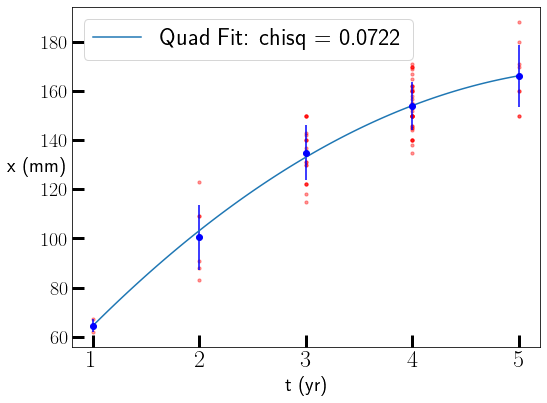

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu_factor, lu_solve

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

data = np.genfromtxt('03-Computational_Linear_Algebra/bluegills_dataset.csv', delimiter=',')
t = data[:,0]
x = data[:,1]
plt.scatter(t,x, color='red', s=10, alpha=0.4)
plt.xlabel("t (yr)")
plt.ylabel("x (mm)", rotation=0)

# Take only unique values of t and make an array of them
tdata = np.array([tval for tval in set(t)]) 

# For each unique val of t, find the vals of x and avg/stdev them
xdata = np.array([np.average(x[np.where(t==tval)]) for tval in tdata]) 
xerr = np.array([np.std(x[np.where(t==tval)]) for tval in tdata])

plt.errorbar(tdata,xdata, yerr=xerr, color='blue',fmt="o")

# Now, do the Regression
s = np.sum(1 / xerr**2)
st = np.sum(tdata / xerr**2)
stt = np.sum(tdata**2 / xerr**2)
sttt = np.sum(tdata**3 / xerr**2)
stttt = np.sum(tdata**4 / xerr**2)

sx = np.sum(xdata / xerr**2)
stx = np.sum(tdata * xdata / xerr**2)
sttx = np.sum(tdata**2 * xdata / xerr**2)

smat = np.array([[s, st, stt],
                 [st, stt, sttt],
                 [stt, sttt, stttt]])
svec = np.array([sx, 
                 stx, 
                 sttx])

s_fact, piv = lu_factor(smat)
avec = lu_solve((s_fact, piv),svec)

# Finally, plot the fitted function with avec coefficients
fit_func = np.polynomial.polynomial.Polynomial(avec)
t_fit, x_fit = fit_func.linspace(n=100, domain=[tdata[0],tdata[-1]])
chi_sq = np.sum(((xdata - fit_func(tdata))/xerr)**2)

plt.plot(t_fit, x_fit, label=f"Quad Fit: chisq = {chi_sq:1.4f}")


plt.legend()
plt.show()

#### Postscript

Actually, all this effort was not strictly necessary for the problem above. SciPy already has a fitting routine that does this automatically. Look at the help documentation for 'scipy.optimize.curve_fit'. Th problem was a simple exercise on solving linear equations numerically. In any case, make sure that your fit is correct by comparing it with the output of the 'curve_fit' routine. A part of the documentation for this fitting routine is reproduced below.


Help on function curve_fit in module scipy.optimize.minpack:

    curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
        Use non-linear least squares to fit a function, f, to data.

        Assumes ``ydata = f(xdata, *params) + eps``.

        Parameters
        ----------
        f : callable
            The model function, f(x, ...). It must take the independent
            variable as the first argument and the parameters to fit as
            separate remaining arguments.
        xdata : array_like or object
            The independent variable where the data is measured.
            Should usually be an M-length sequence or an (k,M)-shaped array for
            functions with k predictors, but can actually be any object.
        ydata : array_like
            The dependent data, a length M array - nominally ``f(xdata, ...)``.
        
        ...
        ...
        ...
        
        
        Returns
        -------
        popt : array
            Optimal values for the parameters so that the sum of the squared
            residuals of ``f(xdata, *popt) - ydata`` is minimized.
        pcov : 2-D array
            The estimated covariance of popt. The diagonals provide the variance
            of the parameter estimate. To compute one standard deviation errors
            on the parameters use ``perr = np.sqrt(np.diag(pcov))``         

       ...
       ...

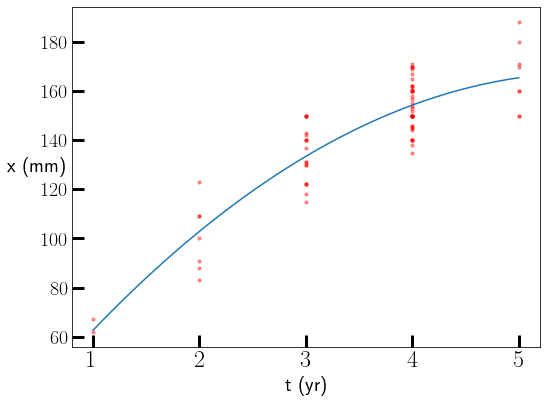

In [106]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

data = np.genfromtxt('03-Computational_Linear_Algebra/bluegills_dataset.csv', delimiter=',')
t = data[:,0]
x = data[:,1]
plt.scatter(t,x, color='red', s=10, alpha=0.4)
plt.xlabel("t (yr)")
plt.ylabel("x (mm)", rotation=0)

params, conv = curve_fit(lambda t,a,b,c: a + b*t + c*t**2, t, x)
fit_func = np.polynomial.polynomial.Polynomial(params)
t_fit, x_fit = fit_func.linspace(n=100, domain=[tdata[0],tdata[-1]])
plt.plot(t_fit, x_fit)
plt.show()